# Inspect data from Meteo France

## 1. Load libraries and data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Quotidien

In [34]:
data_quotidien_1 = pd.read_csv('../data/climato_de_base/quotidien/Q_05_1877-1949_RR-T-Vent.csv', sep=';')
data_quotidien_2 = pd.read_csv('../data/climato_de_base/quotidien/Q_05_previous-1950-2023_RR-T-Vent.csv', sep=';')
data_quotidien_3 = pd.read_csv('../data/climato_de_base/quotidien/Q_05_latest-2024-2025_RR-T-Vent.csv', sep=';')

data_quotidien_1.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR
0,5001001,ABRIES,44.796667,6.928333,1560,19320101,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5001001,ABRIES,44.796667,6.928333,1560,19320102,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5001001,ABRIES,44.796667,6.928333,1560,19320103,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5001001,ABRIES,44.796667,6.928333,1560,19320104,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5001001,ABRIES,44.796667,6.928333,1560,19320105,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Mensuel, decadaire et horaire

In [35]:
data_decadaire_1 = pd.read_csv('../data/climato_de_base/decadaire/DECADQ_05_1877-1949.csv', sep=";")
data_decadaire_2 = pd.read_csv('../data/climato_de_base/decadaire/DECADQ_05_previous-1950-2023.csv', sep=";")
data_decadaire_3 = pd.read_csv('../data/climato_de_base/decadaire/DECADQ_05_latest-2024-2025.csv', sep=";")

data_mensuel_1 = pd.read_csv('../data/climato_de_base/mensuel/MENSQ_05_1877-1949.csv', sep=";")
data_mensuel_2 = pd.read_csv('../data/climato_de_base/mensuel/MENSQ_05_previous-1950-2023.csv', sep=";")
data_mensuel_3 = pd.read_csv('../data/climato_de_base/mensuel/MENSQ_05_latest-2024-2025.csv', sep=";")

data_horaire_1 = pd.read_csv('../data/climato_de_base/horaire/H_05_1940-1949.csv', sep=";")
# the rest later

data_mensuel_1.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMM,RR,QRR,NBRR,RR_ME,...,QNEIGETOTM,NEIGETOTAB,QNEIGETOTAB,NEIGETOTABDAT,NBJNEIGETOT1,NBJNEIGETOT10,NBJNEIGETOT30,NBJGREL,NBJORAG,NBJBROU
0,5001001,ABRIES,44.796667,6.928333,1560,193201,30.3,1.0,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5001001,ABRIES,44.796667,6.928333,1560,193202,0.0,1.0,29.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5001001,ABRIES,44.796667,6.928333,1560,193203,55.9,1.0,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5001001,ABRIES,44.796667,6.928333,1560,193204,104.3,1.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5001001,ABRIES,44.796667,6.928333,1560,193205,122.5,1.0,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Informations sur les datas

Comme on peut le voir, le format des fichiers est le même pour les quatres types de données (mensuel, décadaire, quotidien, horaire).
Donc nous allons nous focaliser sur les données quotidienne pour l'instant pour voir les informations qu'on peut en tirer et avoir le plus d'informations possibles.

De plus, on voit d'autres paramètres dans un autre dataset mais pour l'instant on va se concentrer sur les données quotidiennes.

J'ai choisi une région spécifique le 05 pour commencer à voir le format, mais on pourrait faire la même chose pour d'autres régions.

## 2. Inspect data

#### 2.1. Merge data

In [36]:
data_quotidien = pd.concat([data_quotidien_1, data_quotidien_2, data_quotidien_3], ignore_index=True)

data_quotidien

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR
0,5001001,ABRIES,44.796667,6.928333,1560,19320101,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5001001,ABRIES,44.796667,6.928333,1560,19320102,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5001001,ABRIES,44.796667,6.928333,1560,19320103,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5001001,ABRIES,44.796667,6.928333,1560,19320104,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5001001,ABRIES,44.796667,6.928333,1560,19320105,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465473,5183001,VILLAR ST PANCRACE,44.880333,6.640333,1310,20250328,0.0,1.0,-0.3,1.0,...,NaN,NaN,11.5,1.0,NaN,NaN,1638.0,9.0,NaN,NaN
1465474,5183001,VILLAR ST PANCRACE,44.880333,6.640333,1310,20250329,0.0,1.0,3.3,1.0,...,NaN,NaN,10.7,1.0,NaN,NaN,38.0,9.0,NaN,NaN
1465475,5183001,VILLAR ST PANCRACE,44.880333,6.640333,1310,20250330,0.0,1.0,2.8,1.0,...,NaN,NaN,11.2,1.0,NaN,NaN,446.0,9.0,NaN,NaN
1465476,5183001,VILLAR ST PANCRACE,44.880333,6.640333,1310,20250331,0.0,1.0,4.2,1.0,...,NaN,NaN,12.7,1.0,NaN,NaN,1552.0,9.0,NaN,NaN


### 2.2. Explication colonnes

In [37]:
df_desc = pd.read_csv('../data/climato_de_base/quotidien/descriptif/Q_descriptif_refactorisé_RR-T-Vent.csv', sep=";")


df_desc

,colonne,descriptif
0,NUM_POSTE,numéro Météo-France du poste sur 8 chiffres
1,NOM_USUEL,nom usuel du poste
2,LAT,"latitude, négative au sud (en degrés et millio..."
3,LON,"longitude, négative à l’ouest de GREENWICH (en..."
4,ALTI,altitude du pied de l'abri ou du pluviomètre s...
5,AAAAMMJJ,date de la mesure (année mois jour)
6,RR,quantité de précipitation tombée en 24 heures ...
7,TN,température minimale sous abri (en °C et 1/10)
8,HTN,heure de TN (hhmm)
9,TX,température maximale sous abri (en °C et 1/10)


#### Informations utiles
En regardant le contenu de chaque colonne et celle qui sont disponible sur notre dataset, voyons voir ce qui est intéressant

#### Informations générales
- **NUM_POSTE**: C'est le numéro du poste de mesure
- **NOM_USUEL**: C'est le nom usuel du poste de mesure
- **LAT**: C'est la latitude du poste de mesure
- **LON**: C'est la longitude du poste de mesure
- **ALTI**: C'est l'altitude du poste de mesure
- **AAAAMMJJ**: C'est la date au format AAAAMMJJ

#### Température
- **TN**: C'est la température minimale
- **TX**: C'est la température maximale
- **TM**: C'est la température moyenne
- **TNTXM**: C'est la température moyenne entre la température minimale et maximale
- **TAMPLI**: C'est l'amplitude thermique, ecart entre la température maximale et minimale
- **TNSOL**: C'est la température du sol
- **TN50**: C'est la température minimale à 50cm au dessus du sol

#### Pluie
- **RR**: C'est la pluie
- **DRR**: C'est la durée des précipitations

#### Vent
- **FFM**: Moyenne quotidienne de la force du vent moyenné sur 10min, à 10m
- **FXY**: C'est la vitesse maximale du vent sur 10min, à 10m

### 2.3. Filter data
On va donc transformer les données pour ne garder que les colonnes qui nous intéressent et les lignes qui nous intéressent.

Et enlever les lignes qui ne sont pas des données quotidiennes (Non mesurées, etc.)

In [38]:
desc_to_keep = ["NUM_POSTE", "NOM_USUEL", "LAT", "LON", "ALTI", "AAAAMMJJ", "TN", "TX", "TM", "TNTXM", "TAMPLI", "TNSOL", "TN50", "RR", "DRR", "FFM", "FXY"]

df_desc_filter = df_desc[df_desc["colonne"].isin(desc_to_keep)]

data = data_quotidien[desc_to_keep]


data


,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,TN,TX,TM,TNTXM,TAMPLI,TNSOL,TN50,RR,DRR,FFM,FXY
0,5001001,ABRIES,44.796667,6.928333,1560,19320101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,5001001,ABRIES,44.796667,6.928333,1560,19320102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,5001001,ABRIES,44.796667,6.928333,1560,19320103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,5001001,ABRIES,44.796667,6.928333,1560,19320104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,5001001,ABRIES,44.796667,6.928333,1560,19320105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465473,5183001,VILLAR ST PANCRACE,44.880333,6.640333,1310,20250328,-0.3,16.1,6.8,7.9,16.4,NaN,NaN,0.0,NaN,2.0,4.6
1465474,5183001,VILLAR ST PANCRACE,44.880333,6.640333,1310,20250329,3.3,10.8,6.6,7.1,7.5,NaN,NaN,0.0,NaN,3.5,6.4
1465475,5183001,VILLAR ST PANCRACE,44.880333,6.640333,1310,20250330,2.8,16.7,9.9,9.8,13.9,NaN,NaN,0.0,NaN,3.7,7.0
1465476,5183001,VILLAR ST PANCRACE,44.880333,6.640333,1310,20250331,4.2,16.7,10.1,10.5,12.5,NaN,NaN,0.0,NaN,3.6,6.6


In [51]:
data = data.dropna(subset=["TNTXM", "TN", "TX"])

data

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,TN,TX,TM,TNTXM,TAMPLI,TNSOL,TN50,RR,DRR,FFM,FXY,année
17640,5023002,BRIANCON,44.896667,6.638333,1406,1948-03-01,-0.7,9.6,NaN,4.5,10.3,NaN,NaN,0.0,NaN,NaN,NaN,1948
17641,5023002,BRIANCON,44.896667,6.638333,1406,1948-03-02,0.8,6.3,NaN,3.6,5.5,NaN,NaN,0.0,NaN,NaN,NaN,1948
17642,5023002,BRIANCON,44.896667,6.638333,1406,1948-03-03,-0.2,11.8,NaN,5.8,12.0,NaN,NaN,0.0,NaN,NaN,NaN,1948
17643,5023002,BRIANCON,44.896667,6.638333,1406,1948-03-04,-1.2,14.6,NaN,6.7,15.8,NaN,NaN,0.0,NaN,NaN,NaN,1948
17644,5023002,BRIANCON,44.896667,6.638333,1406,1948-03-05,1.8,14.2,NaN,8.0,12.4,NaN,NaN,0.0,NaN,NaN,NaN,1948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465473,5183001,VILLAR ST PANCRACE,44.880333,6.640333,1310,2025-03-28,-0.3,16.1,6.8,7.9,16.4,NaN,NaN,0.0,NaN,2.0,4.6,2025
1465474,5183001,VILLAR ST PANCRACE,44.880333,6.640333,1310,2025-03-29,3.3,10.8,6.6,7.1,7.5,NaN,NaN,0.0,NaN,3.5,6.4,2025
1465475,5183001,VILLAR ST PANCRACE,44.880333,6.640333,1310,2025-03-30,2.8,16.7,9.9,9.8,13.9,NaN,NaN,0.0,NaN,3.7,7.0,2025
1465476,5183001,VILLAR ST PANCRACE,44.880333,6.640333,1310,2025-03-31,4.2,16.7,10.1,10.5,12.5,NaN,NaN,0.0,NaN,3.6,6.6,2025


### 3. Visualize data

### 3.1 Visualize evolution of maximum temperature each year

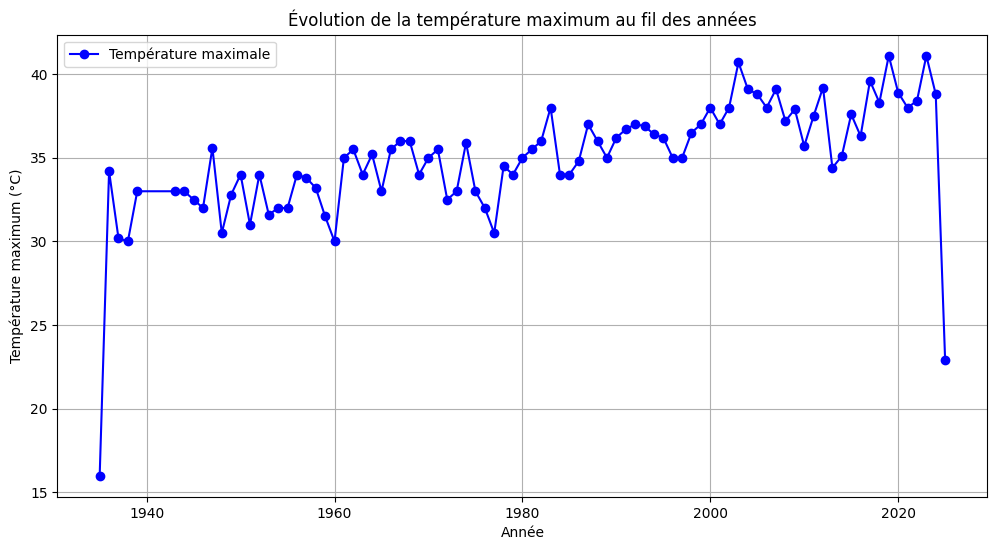

In [54]:
data.loc[:, "année"] = data["AAAAMMJJ"].astype(str).str[:4].astype(int)
data_group = data.groupby("année")["TX"].max().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(data_group["année"], data_group["TX"], marker="o", linestyle="-", color="b", label="Température maximale")

plt.xlabel("Année")
plt.ylabel("Température maximum (°C)")
plt.title("Évolution de la température maximum au fil des années")
plt.grid(True)
plt.legend()
plt.show()



#### 3.2 Visualize evolution of minimum temperature each year

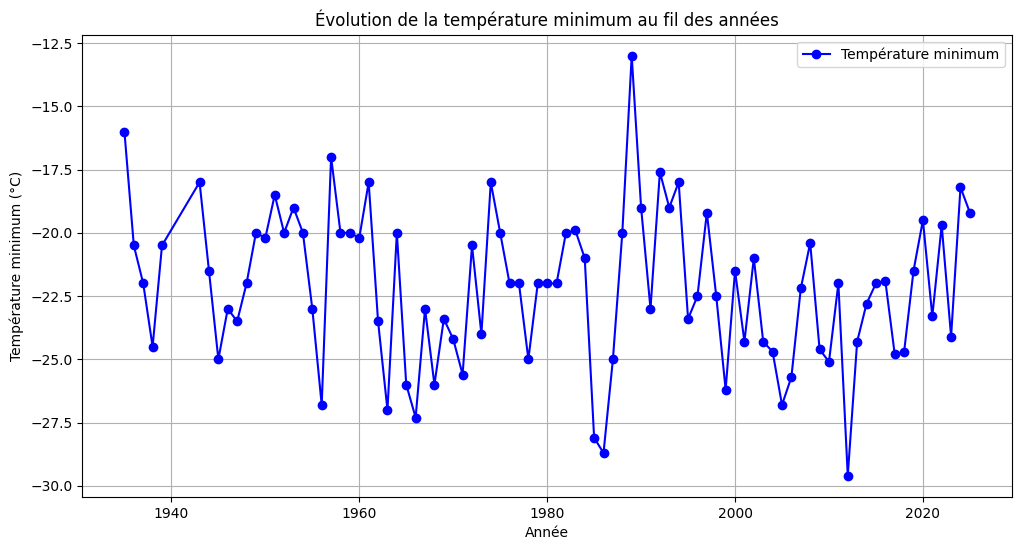

In [55]:
data_group = data.groupby("année")["TN"].min().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(data_group["année"], data_group["TN"], marker="o", linestyle="-", color="b", label="Température minimum")

plt.xlabel("Année")
plt.ylabel("Température minimum (°C)")
plt.title("Évolution de la température minimum au fil des années")
plt.grid(True)
plt.legend()
plt.show()

### 3.3 Visualize evolution of rain each year

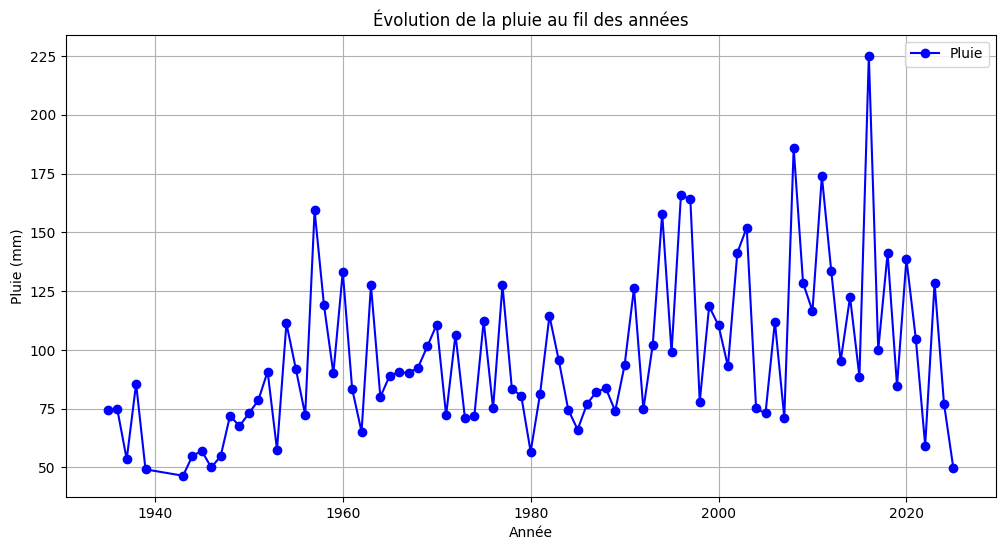

In [57]:
data_group = data.groupby("année")["RR"].max().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(data_group["année"], data_group["RR"], marker="o", linestyle="-", color="b", label="Pluie")
plt.xlabel("Année")
plt.ylabel("Pluie (mm)")
plt.title("Évolution de la pluie au fil des années (Pluie maximum)")
plt.grid(True)
plt.legend()
plt.show()

### 3.4 Visualize evolution of wind each year

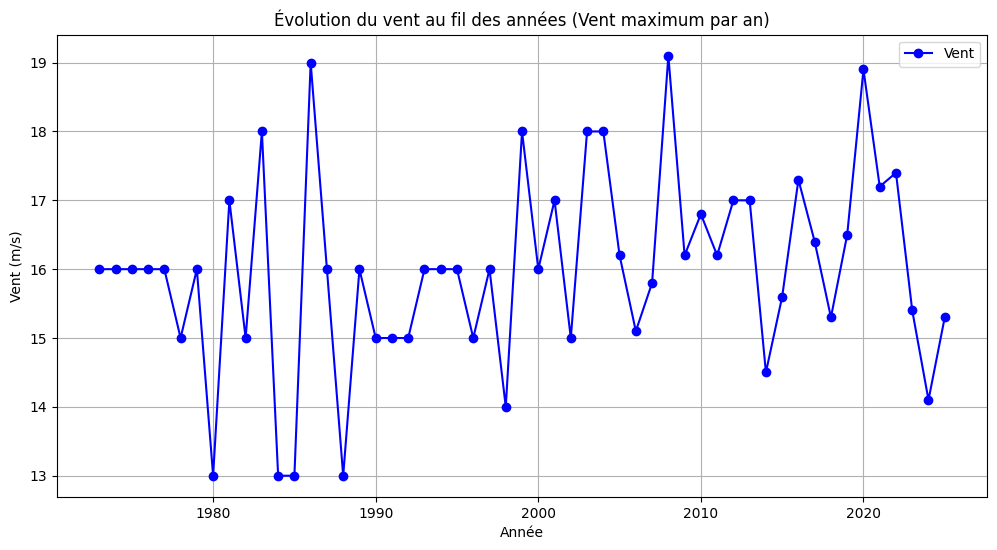

In [58]:
data_group = data.groupby("année")["FXY"].max().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(data_group["année"], data_group["FXY"], marker="o", linestyle="-", color="b", label="Vent")
plt.xlabel("Année")
plt.ylabel("Vent (m/s)")
plt.title("Évolution du vent au fil des années (Vent maximum par an)")
plt.grid(True)
plt.legend()
plt.show()

### 4. Conclusion

On peut donc conclure que les données sont bien formatées et qu'on peut en tirer des informations intéressantes.
Et de plus, on peut voir qu'au niveau des températures, il y a bien une tendance à la hausse au fil des années.